# Bank Marketing Prediction  
This notebook applies a *Decision Tree model* to predict whether a customer will subscribe to a term deposit.  
We preprocess the dataset, train a model, and make predictions on new customer data.  

## Steps Covered:
- Data preprocessing (encoding categorical variables, handling missing values, feature selection)
- Training a Decision Tree model with *SMOTE and hyperparameter tuning*
- Making predictions on a sample dataset
- Interpreting results

In [ ]:
# Import the necessary libraries 
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/acer/Desktop/Data_science_projects/bank-additional-full.csv", sep = ";") 

In [4]:
# Display the first 5 rows of the dataset
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


**The output shows that there are no missing values in any of the columns, meaning the dataset is complete and doesn't require any filling in of missing data.**

In [6]:
# Check DataTypes
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [9]:
df.shape

(41176, 21)

In [10]:
# Check for "unknown" values in categorical columns
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].isin(['unknown']).sum()} unknown values")

job: 330 unknown values
marital: 80 unknown values
education: 1730 unknown values
default: 8596 unknown values
housing: 990 unknown values
loan: 990 unknown values
contact: 0 unknown values
month: 0 unknown values
day_of_week: 0 unknown values
poutcome: 0 unknown values
y: 0 unknown values


The dataset has some missing or unknown values in several columns:

- **Job**: 330 unknown values
- **Marital Status**: 80 unknown values
- **Education**: 1,730 unknown values
- **Default**: 8,596 unknown values
- **Housing**: 990 unknown values
- **Loan**: 990 unknown values

The other columns do not have any missing or unknown values. This means we need to address these unknown values in the 'Job', 'Marital Status', 'Education', 'Default', 'Housing', and 'Loan' columns to ensure the data is complete and accurate.

In [11]:
# Columns where 'unknown' values can be replaced with the most frequent value (mode)
cols_replace_mode = ["job", "marital", "education", "housing", "loan"]

for col in cols_replace_mode:
    # Replace 'unknown' with the most frequent value in the column
    df[col] = df[col].replace("unknown", df[col].mode()[0])

In [12]:
# The 'default' column has a high percentage (~21%) of 'unknown' values, so it's better to drop it
df = df.drop(columns=["default"])

In [13]:
# Verify if all 'unknown' values are removed
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].isin(['unknown']).sum()} unknown values")

job: 0 unknown values
marital: 0 unknown values
education: 0 unknown values
housing: 0 unknown values
loan: 0 unknown values
contact: 0 unknown values
month: 0 unknown values
day_of_week: 0 unknown values
poutcome: 0 unknown values
y: 0 unknown values


**VIZUALIZATION**

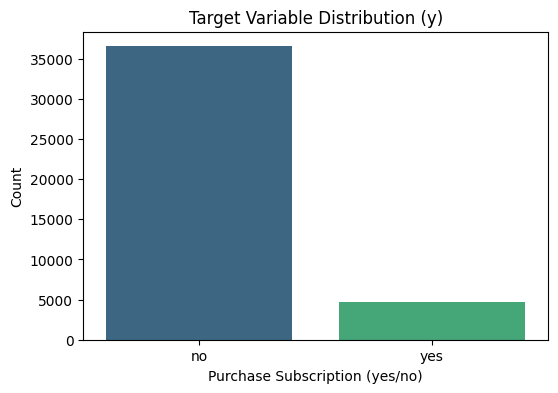

In [14]:
# Visualizing the distribution of the target variable (y)
# This helps us understand whether the dataset is imbalanced,
# which is important for model performance.

plt.figure(figsize = (6, 4))
sns.countplot(x = df["y"], hue = df["y"], palette = "viridis", legend = False)
plt.title("Target Variable Distribution (y)")
plt.xlabel("Purchase Subscription (yes/no)")
plt.ylabel("Count")
plt.show()



**The bar chart shows that the majority of customers did not subscribe to the product/service ("no"), while only a small fraction of customers subscribed ("yes").**
**This indicates a class imbalance in our target variable, which we may need to address during model training.**

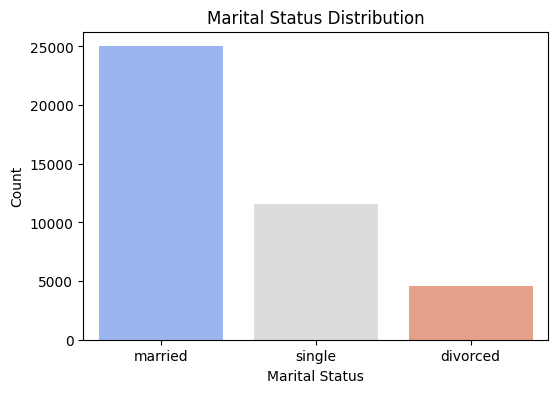

In [15]:
# Visualization of the distribution of marital status in the dataset.  
# This helps us understand the proportion of different marital statuses among the customers.  

plt.figure(figsize=(6, 4))
sns.countplot(x=df["marital"], hue= df["marital"], palette="coolwarm", order=df["marital"].value_counts().index, legend = False)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

**The majority of customers in the dataset are married, followed by single individuals, while divorced customers make up the smallest group. This indicates that marital status may play a role in customer behavior.**

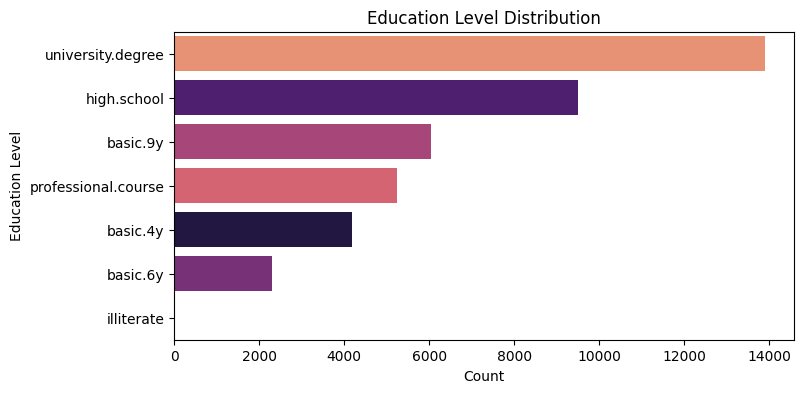

In [16]:
# Visualization of the distribution of education levels in the dataset.  
# This provides insight into the educational background of the customers,  
# which may be relevant in predicting their likelihood of purchasing the product/service.  

plt.figure(figsize=(8, 4))
sns.countplot(y=df["education"], hue=df["education"], palette="magma", order=df["education"].value_counts().index, legend=False)
plt.title("Education Level Distribution")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

**Most customers have a university degree, followed by those with a high school education. There are fewer people with basic education (4-year, 6-year, or 9-year), professional**
**courses, and the least number of illiterate individuals. This means higher education levels are more common in the dataset, which could be worth considering in further analysis**

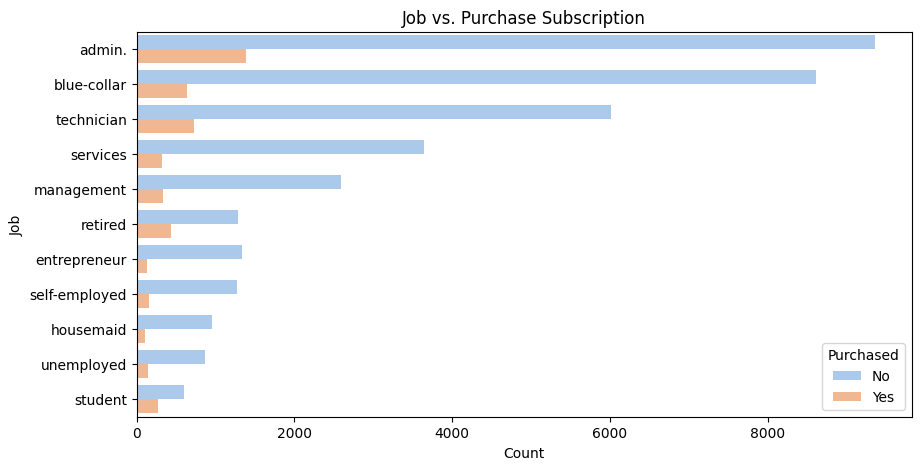

In [17]:
# Visualizing the distribution of job roles and their purchase decisions
plt.figure(figsize=(10, 5))
sns.countplot(y=df["job"], hue=df["y"], palette="pastel", order=df["job"].value_counts().index, legend=False)    
plt.title("Job vs. Purchase Subscription")
plt.xlabel("Count")
plt.ylabel("Job")
plt.legend(title="Purchased", labels=["No", "Yes"])
plt.show()

**Most customers work in administrative, blue-collar, or technician roles. The number of subscriptions is noticeably lower across all job types, but retirees and students seem to have a slightly higher subscription rate compared to others.**

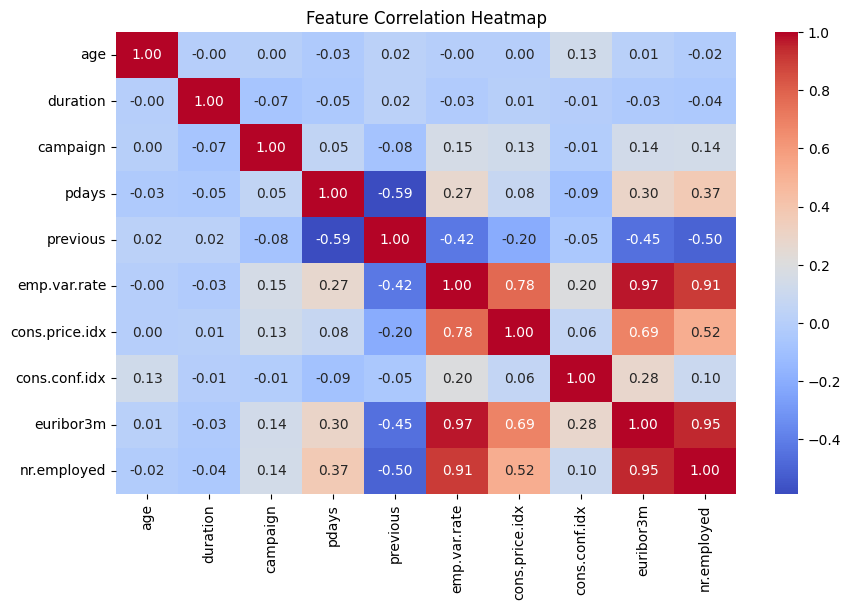

In [18]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**The heatmap shows strong positive correlations between nr.employed, emp.var.rate, and euribor3m, suggesting these features are closely related. previous and pdays have a negative correlation, which could indicate that a higher number of previous contacts is linked to fewer days since the last contact. Most other correlations are weak, meaning they don’t have strong linear relationships.**

**ENCODING**

In [19]:
# Label encode Education

# Define the order of education levels
education_order = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']

# Apply label encoding based on this order
df['education'] = df['education'].apply(lambda x: education_order.index(x))

In [20]:
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,1,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,4,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,4,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,2,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,4,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,5,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,5,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,6,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,5,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [21]:
# One-Hot Encoding for other Categorical Columns
df = pd.get_dummies(df, columns = ['job', 'marital', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)


In [22]:
# Convert 'yes'/'no' columns to numeric
df["housing"] = df["housing"].map({"yes": 1, "no": 0})
df["loan"] = df["loan"].map({"yes": 1, "no": 0})
df["y"] = df["y"].map({"yes": 1, "no": 0})

**MACHINE LEARNING**

In [23]:
# Define features (X) and target (y)
X = df.drop(columns=["y"])  # Dropping the target variable
y = df["y"]  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [24]:
# Initialize the model
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8889023797960175
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      7308
           1       0.51      0.48      0.50       928

    accuracy                           0.89      8236
   macro avg       0.72      0.71      0.72      8236
weighted avg       0.89      0.89      0.89      8236



The classification report shows the performance of a model on a binary classification task. Here are the key observations:

- **Accuracy**: The overall accuracy of the model is 89%.
- **Class 0 (Non-Positive Class)**:
  - Precision: 0.93
  - Recall: 0.94
  - F1-Score: 0.94

- **Class 1 (Positive Class)**:
  - Precision: 0.51
  - Recall: 0.48
  - F1-Score: 0.50


The model performs well on the majority class (Class 0) with high precision, recall, and F1-score. However, it performs poorly on the minority class (Class 1), with much lower precision, recall, and F1-score. This indicates an imbalance in the dataset, where the model is biased towards the majority class.
After seeing this result, applying SMOTE can help balance the dataset, improve the model's performance on the minority class, and achieve better overall classification metrics.

In [25]:
from imblearn.over_sampling import SMOTE

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train model
smote_model = DecisionTreeClassifier(random_state=42)
smote_model.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred = smote_model.predict(X_test)
print(classification_report(y_test, y_pred)) 


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7308
           1       0.49      0.56      0.52       928

    accuracy                           0.89      8236
   macro avg       0.72      0.74      0.73      8236
weighted avg       0.89      0.89      0.89      8236




With SMOTE, the model maintains a high precision (94%) and recall (93%) for class 0, meaning it correctly identifies most negative cases while minimizing false positives. However, for class 1, precision remains low at 49%, and recall is 56%, showing slight improvement in detecting positive cases but still struggling with false positives. The overall accuracy remains at 89%, with a macro average f1-score of 0.73. While SMOTE slightly balances the recall between classes, the trade-off in precision for the minority class suggests further tuning might be needed.

**HYPER-PARAMETER TUNING**

We are tuning with SMOTE instead of class weighting because SMOTE showed a slight improvement in recall for class 1 while maintaining overall accuracy.<br>
Class weighting alone didn’t significantly improve recall for the minority class. By tuning with SMOTE, we aim to further optimize model performance while ensuring better representation of the minority class.<br>

In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit on training data (use SMOTE-applied X_train and y_train)
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_smote, y_train_smote)

# Evaluate on test data
y_pred = best_dt.predict(X_test)
print("Tuned Model Performance:\n", classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Model Performance:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      7308
           1       0.51      0.64      0.57       928

    accuracy                           0.89      8236
   macro avg       0.73      0.78      0.75      8236
weighted avg       0.90      0.89      0.90      8236



The SMOTE + hyperparameter tuning model did better than the others. Accuracy is still 89%, but recall for buyers (class 1) improved to 64%, meaning we’re catching more actual purchasers. Precision dropped a bit (51%), but it’s a fair tradeoff since we want to identify potential buyers. Overall, this model does a better job at separating buyers from non-buyers. This looks like the best pick for making predictions


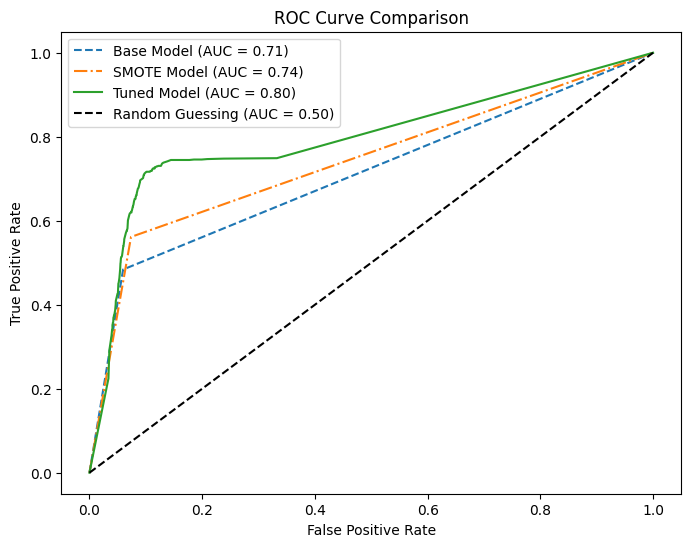

In [27]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each model
y_probs_base = model.predict_proba(X_test)[:, 1]  # Class-weighted model
y_probs_smote = smote_model.predict_proba(X_test)[:, 1]  # SMOTE model
y_probs_tuned = best_dt.predict_proba(X_test)[:, 1]  # Tuned SMOTE model

# Compute ROC curve and AUC for each model
fpr_base, tpr_base, _ = roc_curve(y_test, y_probs_base)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_probs_smote)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_probs_tuned)

auc_base = auc(fpr_base, tpr_base)
auc_smote = auc(fpr_smote, tpr_smote)
auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f'Base Model (AUC = {auc_base:.2f})', linestyle='--')
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE Model (AUC = {auc_smote:.2f})', linestyle='-.')
plt.plot(fpr_tuned, tpr_tuned, label=f'Tuned Model (AUC = {auc_tuned:.2f})', linestyle='-')

# Random guessing line (baseline)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.50)")

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

**Observations from the ROC Curve:**
- **1. Tuned Model Wins**  – The tuned model (AUC = 0.80) outperforms both the base and SMOTE models (AUC = 0.74). Fine-tuning clearly improved the model’s ability to distinguish between buyers and non-buyers.
- **2. SMOTE Didn’t Do Much Alone** – Oversampling alone didn’t boost performance (same AUC as the base model), but combining it with hyperparameter tuning made a difference.
- **3. Why We’re Sticking With the Tuned Model** – A higher AUC means better classification, and the tuned model’s curve stays above the rest, making it the best choice for predictions.

In [36]:
# Save the trained model  
joblib.dump(model, 'best_dt.pkl')  
print("Model saved successfully!")

Model saved successfully!


In [37]:
original_features = X.columns.tolist()  # X is your feature matrix after encoding
joblib.dump(original_features, 'features.pkl')  
print("Feature names saved!")

Feature names saved!


In [33]:
df.shape

(41176, 42)

In [35]:
print(df['y'].value_counts(normalize=True))

y
0    0.887337
1    0.112663
Name: proportion, dtype: float64
